# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Parte 3: Regresión

__Número de grupo: 04__

__Nombres de los estudiantes: Carlos Tardón Rubio y Carlos Morán Alfonso__

En este notebook trabajaremos con una colección de datos de alquileres de Airbnb en Amsterdam. El objetivo de este problema es entrenar una red neuronal capaz de predecir el precio del alojamiento a partir de un conjunto de características.

In [1]:
RANDOM_STATE = 333
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
import numpy as np

## 1) Descripción de los datos

Carga el fichero de datos `airbnb.csv` en un dataframe. Describe el conjunto de datos y trata de interpretar el significado de cada una de las variables. Estudia la distribución de precios.

In [2]:
df = pd.read_csv("airbnb.csv") # No hay nulls, no hace falta hacer dropna
df

accommodates  bathrooms  bedrooms  guests_included  \
0                 4        2.0       2.0                1   
1                 4        1.0       2.0                2   
2                 2        1.0       1.0                1   
3                 2        1.0       1.0                1   
4                 2        1.0       1.0                1   
...             ...        ...       ...              ...   
14993             2        1.0       1.0                1   
14994             4        1.0       2.0                1   
14995             2        1.0       1.0                1   
14996             3        1.0       1.0                1   
14997             2        1.0       1.0                1   

       host_listings_count   latitude  longitude  minimum_nights  \
0                      1.0  52.358466   4.933843               2   
1                      1.0  52.363589   4.983353               3   
2                      1.0  52.375209   4.861647               3   
3                      1.0  52.387382   4.890457               2   
4                      1.0  52.384062   4.889877               3   
...                    ...        ...        ...             ...   
14993                 43.0  52.382970   4.873389               3   
14994                  1.0  52.347479   4.833644               4   
14995                  1.0  52.370400   4.918489               1   
14996                  1.0  52.389637   4.879580               2   
14997                  1.0  52.365212   4.868335               1   

       number_of_reviews  distance_centre  instant_bookable  entire_home  \
0                      8         3.279483                 0            1   
1                      0         5.951843                 0            1   
2                      8         2.601055                 0            1   
3                     41         1.095138                 0            0   
4                      0         0.844491                 0            1   
...                  ...              ...               ...          ...   
14993                 10         1.815773                 0            1   
14994                  2         5.687407                 1            1   
14995                  5         1.620395                 0            1   
14996                  7         1.777881                 0            1   
14997                  2         2.619788                 0            1   

       private_room  shared_room  price  
0                 0            0  160.0  
1                 0            0  120.0  
2                 0            0   99.0  
3                 1            0  100.0  
4                 0            0  175.0  
...             ...          ...    ...  
14993             0            0  140.0  
14994             0            0  120.0  
14995             0            0  120.0  
14996             0            0   95.0  
14997             0            0  120.0  

[14998 rows x 15 columns]

In [3]:
df.describe().transpose()

count        mean        std        min        25%  \
accommodates         14998.0    2.880317   1.298492   1.000000   2.000000   
bathrooms            14998.0    1.116215   0.343442   0.000000   1.000000   
bedrooms             14998.0    1.390919   0.839649   0.000000   1.000000   
guests_included      14998.0    1.499333   0.940643   1.000000   1.000000   
host_listings_count  14998.0    3.372316  11.203593   0.000000   1.000000   
latitude             14998.0   52.365312   0.015765  52.290308  52.355582   
longitude            14998.0    4.889033   0.035010   4.753513   4.864839   
minimum_nights       14998.0    2.885051   7.252271   1.000000   2.000000   
number_of_reviews    14998.0   17.797440  34.766613   0.000000   2.000000   
distance_centre      14998.0    2.998582   1.610995   0.115801   1.948924   
instant_bookable     14998.0    0.155954   0.362824   0.000000   0.000000   
entire_home          14998.0    0.777170   0.416159   0.000000   1.000000   
private_room         14998.0    0.218562   0.413285   0.000000   0.000000   
shared_room          14998.0    0.004267   0.065187   0.000000   0.000000   
price                14998.0  130.050273  63.820328  19.000000  89.000000   

                            50%         75%         max  
accommodates           2.000000    4.000000   17.000000  
bathrooms              1.000000    1.000000    8.000000  
bedrooms               1.000000    2.000000   10.000000  
guests_included        1.000000    2.000000   16.000000  
host_listings_count    1.000000    1.000000  106.000000  
latitude              52.364960   52.374805   52.426224  
longitude              4.886370    4.907953    5.027689  
minimum_nights         2.000000    3.000000  523.000000  
number_of_reviews      7.000000   18.000000  496.000000  
distance_centre        2.841338    3.577086   11.842162  
instant_bookable       0.000000    0.000000    1.000000  
entire_home            1.000000    1.000000    1.000000  
private_room           0.000000    0.000000    1.000000  
shared_room            0.000000    0.000000    1.000000  
price                115.000000  150.000000  440.000000

###### Interpretación variables

- Accommodates: es el número de personas que pueden acomodarse como máximo en cada una de las viviendas. El dataset recoge alquileres que pueden acoger entre 1 y 17 personas. Sin embargo, la media está en 2.8 (es decir, entre 2 y 3), y además el percentil 75 es de 4, lo que significa que tenemos el 75% datos por debajo de 4, y unas pocas muestras muy por encima, por lo que tiene una distribución con una cola baja y extensa.
-bathrooms: número de baños. Puede rondar entre 0 y 8, pero la media es de 1.11, lo cual es esperable pues la media de accommodates era próxima a 3.
-bedrooms: Número de habitaciones, entre 0 y 10, con una media de 1.39 habitaciones/alquiler.
-guests_included: número de personas que van a convivir contigo. Entre 1 y 16, con una media entre 2 y 3.
-host_listings_count: suponemos que es el número de anuncios que ha hecho una misma persona/empresa, pues el percentil 50 es 1, que se correspondería con propietarios individuales, y el máximo es 106, que será una empresa inmobiliaria.
-latitude y longitud: la posición exacta en el globo terraqueo. Podemos comprobar que la latitud está entorno a 51.3, y la longitud entre 4.75 y 5, lo que se corresponde con ubicaciones de Ámsterdam.
-minimum_nights: el mínimo número de noches que tienes que contratar. Una media de casi 3, pues lo más típico es que te dejen pasar un fin de semana.
-number_of_reviews: número de reviews que tiene esta propiedad en la web. La media es de 17.79, aunque el percentil 25 está en 2, lo cual significa que hay propiedades cuyas reviews son tan escasas que no nos servirían para predecir la calidad del inmueble(en un supuesto problema de clasificación de calidades)
-distance_centre: distancia al centro. Suponemos que esta variable influirá en el precio de forma inversa, cuanto más alejado menos precio. La media es de 3, así que suponemos que está en kilómetros.
-instant_bookable: un booleano, que indica si está disponible para alquilarse instantáneamente.
-entire_home: un booleano que indica si se alquila la casa completa.
-private_room: un booleano que indica si tienes una habitación privada(para ti solo)
-shared_room: un booleano que indica si hay lugares comunes (o si los puedes usar) (suponemos que indica si hay salón, etc)
-price: el precio, entre 19 y 440 por noche. 


<AxesSubplot:ylabel='Density'>

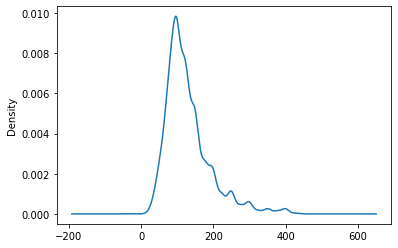

In [4]:
df.price.plot.density()

<AxesSubplot:>

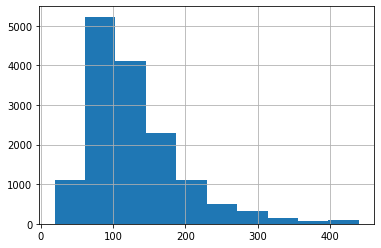

In [5]:
df.price.hist()

In [6]:
df.price.describe()

count    14998.000000
mean       130.050273
std         63.820328
min         19.000000
25%         89.000000
50%        115.000000
75%        150.000000
max        440.000000
Name: price, dtype: float64

En cuanto a la distribución de precios, podemos observar que tenemos muchas muestras de precios en el rango 90-150, mientras que hay alquileres por más de 400 por noche, por lo que, como se observa, la distribución tiene una cola hacia la derecha. La media es de 130 y la std de 63, por lo que los precios están muy concentrados en ese rango. Podemos tener problemas más adelante, pues tenemos pocas muestras de precios altos, por lo que nuestro regresor se comportará peor(suponemos) al predecir el precio de alquileres lujosos.

## 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. Crea un nuevo dataframe que contenga el precio y, además, las variables que estén relacionadas con él por un valor de correlacción de al menos 0.2 (de forma directa o inversa).

In [7]:
# buscamos las variables más correladas con la variable a predecir (price)
correl=df.corr()
correl['price']

accommodates           0.552183
bathrooms              0.283759
bedrooms               0.517237
guests_included        0.338739
host_listings_count    0.109141
latitude               0.027922
longitude              0.035887
minimum_nights         0.007708
number_of_reviews     -0.088437
distance_centre       -0.204698
instant_bookable      -0.004410
entire_home            0.361313
private_room          -0.357184
shared_room           -0.042109
price                  1.000000
Name: price, dtype: float64

In [8]:
var_sel = abs(correl['price']) > 0.2 # elegimos las variables con correlacion de al menos 0.2

In [9]:
df_corr = df[var_sel[var_sel == True].index] # Creamos un nuevo dataframe con las variables seleccionadas
df_corr

accommodates  bathrooms  bedrooms  guests_included  distance_centre  \
0                 4        2.0       2.0                1         3.279483   
1                 4        1.0       2.0                2         5.951843   
2                 2        1.0       1.0                1         2.601055   
3                 2        1.0       1.0                1         1.095138   
4                 2        1.0       1.0                1         0.844491   
...             ...        ...       ...              ...              ...   
14993             2        1.0       1.0                1         1.815773   
14994             4        1.0       2.0                1         5.687407   
14995             2        1.0       1.0                1         1.620395   
14996             3        1.0       1.0                1         1.777881   
14997             2        1.0       1.0                1         2.619788   

       entire_home  private_room  price  
0                1             0  160.0  
1                1             0  120.0  
2                1             0   99.0  
3                0             1  100.0  
4                1             0  175.0  
...            ...           ...    ...  
14993            1             0  140.0  
14994            1             0  120.0  
14995            1             0  120.0  
14996            1             0   95.0  
14997            1             0  120.0  

[14998 rows x 8 columns]

## 3) Normalización

Decide si debes o no normalizar los datos. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.

Si decides escalar los datos deberás crear dos `scalers` distintos, uno para el array con la descripción de los pisos y otro para el array con el precio. Lo hacemos de este modo porque así podremos desescalar las predicciones más fácilmente.

 ###### Vamos a escalar los datos, pues datos muy grandes(mayoritariamente el precio) podrían no funcionar bien con la regularización (pues penalizamos los pesos altos), y además, facilitamos la convergencia del entrenamiento . Vamos a usar minmaxscaler, pues las variables no son normales ( de hecho el precio tiene una asimetría considerable).

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler_x = MinMaxScaler() # Creamos los scalers
scaler_y = MinMaxScaler()

In [12]:
data_df = df_corr[df_corr.columns.difference(['price'])] # Nos quedamos con las columnas que no son price
target_array = df_corr.price.values.reshape(-1,1) # Guardamos la variable a predecir en forma de columna

In [13]:
scaler_x.fit(data_df) # Computamos los parámetros de escalado
scaler_y.fit(target_array)

MinMaxScaler()

In [14]:
data_scaled = scaler_x.transform(data_df) # Escalamos los datos
target_scaled = scaler_y.transform(target_array)

## 4) Entrenamiento y selección

Crea dos redes neuronales de tipo Perceptrón Multicapa:
- La primera con una capa oculta de 200 neuronas
- La segunda con dos capas ocultas cada una de 100 neuronas

Pinta la curva de aprendizaje para cada red variando el parámetro `alpha` que controla el coeficiente de regularización L2 y determina el valor óptimo usando validación cruzada. Asegúrate de que no salen warnings indicando que no se ha alcanzado la convergencia durante el entrenamiento (basta con poner un número de max_iter suficientemente grande).

¿Alguna de las dos redes domina a la otra? ¿Por qué crees que se producen las diferencias?

### MLP: 1 Hidden-Layer with 200 neurons
Creamos un multi layer perceptron regressor que nos proporciona la librería sklearn.Tiene una capa oculta con 200 neuronas, establecido mediante el parámetro hidden_layer_sizes. Vamos a usar una validación cruzada para determinar el coeficiente óptimo de regularización, para lo cual ejecutaremos cross validation sobre el modelo MLPRegressor con alpha=0.1, con alpha=0.01, .. , alpha=0.0000001

In [15]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

cv_scores_mean=[]
cv_scores_std=[]


regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(200, ), # 200 neuronas, una única capa
                     activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, 
                     random_state=RANDOM_STATE) # Random state, para que sea reproducible
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, data_scaled, target_scaled.ravel(), cv=7, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

scores_1, std_1 = cv_scores_mean, cv_scores_std # Guardamos medias y desviaciones de los errores, para poder
                                                # graficarlos y compararlos al siguiente modelo

### MLP: 2 Hidden-Layers with 100 neurons each
Creamos un multi layer perceptron regressor que nos proporciona la librería sklearn. Tiene dos capas ocultas de 100 neuronas, establecido mediante el parámetro hidden_layer_sizes. Vamos a usar una validación cruzada para determinar el coeficiente óptimo de regularización, para lo cual ejecutaremos cross validation sobre el modelo MLPRegressor con alpha=0.1, con alpha=0.01, .. , alpha=0.0000001

In [16]:
cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(100,100), # 2 capas ocultas de 100 neuronas
                     activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, 
                     random_state=RANDOM_STATE)  # Random state, para que sea reproducible
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, data_scaled, target_scaled.ravel(), cv=7, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

scores_2,std_2 = cv_scores_mean, cv_scores_std # Guardamos medias y desviaciones de los errores, para poder
                                                # graficarlos y compararlos al anterior modelo

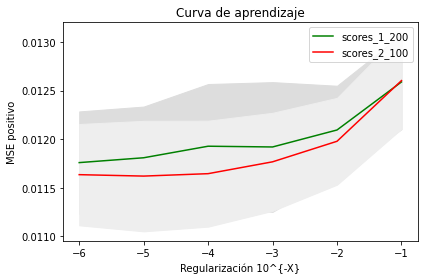

In [17]:
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), -np.array(scores_1), color="g", label="scores_1_200") # 1 capa | 200 neuronas/capa
plt.plot(np.log10(regul_param_range), -np.array(scores_2), color="r", label="scores_2_100") #  2 capas | 100 neuronas/capa

# Dibujamos la banda de la desviación típica para el MLP: 1
lower_limit = -np.array(scores_1) - np.array(std_1)
upper_limit = -np.array(scores_1) + np.array(std_1)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Dibujamos la banda de la desviación típica para el MLP: 2
lower_limit = -np.array(scores_2) - np.array(std_2)
upper_limit = -np.array(scores_2) + np.array(std_2)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#EEEEEE")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("MSE positivo"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

##### Análisis de los resultados (errores positivos)
Como vemos, ambas gráficas de error son algo parecidas, pero tienen sus diferencias. El MLP 1 tiene un error mínimo con alpha=10^(-6), y desde ese punto asciende, mientras que el MLP2 tiene un error mínimo en el rango [10^(-5),10^(-3)], y un error creciente a partir de 10^(-4). Además los datos arrojan que el MLP con 1 capa empeora (hay un pico de error) en alpha=10^(-4), que puede ser debido a una irregularidad a la hora de muestrear aleatoriamente los datos en el cross validation. Además, se observa que el modelo con 2 capas ocultas de 100 neuronas es superior al otro, sobre todo con alpha menores a 10^(-1). Pese a que ambos modelos (teóricamente) podrían aproximar este problema de regresion de forma similar, esta diferencia puede ser debida a dos motivos principales:
- Primero: errores en el muestreo: hemos hecho otros experimentos, con otros random_state distintos, y la diferencia de errores entre los modelos disminuía considerablemente, incluso se invertía(pasando a ser mejor el modelo de una sola capa). En la celda inferior se encuentra uno de ellos, que corresponde a RANDOM_STATE = 42 (para reproducirlo, basta cambiar este parámetro en la primera celda y volver a ejecutar todas las celdas). Con este random_state se consigue que en los experimentos, el modelo de una capa supere a la de dos.
- Segundo: con RANDOM_STATE=333 (el que hemos utilizado para ejecutar este notebook), el modelo de dos capas supera al de una capa. Esto puede ser porque, para entrenar y predecir los datos elegidos con esta configuración, sean necesarias más capas internas para aprender los datos suministrados. Es decir, que necesitemos más estados intermedios para que una red neuronal(real, no teórica) pueda asimilar estos patrones  

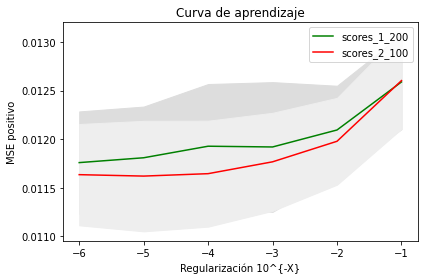

'Ejemplo que demuestra un experimento donde el modelo de 1 capa supera al de dos capas'

In [18]:
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), -np.array(scores_1), color="g", label="scores_1_200") # 1 capa | 200 neuronas/capa
plt.plot(np.log10(regul_param_range), -np.array(scores_2), color="r", label="scores_2_100") #  2 capas | 100 neuronas/capa

# Dibujamos la banda de la desviación típica para el MLP: 1
lower_limit = -np.array(scores_1) - np.array(std_1)
upper_limit = -np.array(scores_1) + np.array(std_1)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Dibujamos la banda de la desviación típica para el MLP: 2
lower_limit = -np.array(scores_2) - np.array(std_2)
upper_limit = -np.array(scores_2) + np.array(std_2)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#EEEEEE")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("MSE positivo"), plt.legend(loc="best")
plt.tight_layout()
plt.show()
"""Ejemplo que demuestra un experimento donde el modelo de 1 capa supera al de dos capas"""

Por tanto, usaremos un modelo con 2 capas ocultas de 100 neuronas cada una. Para elegir el coeficiente de regularización, miremos los errores medios 

In [19]:
scores_2 # Observemos los errores obtenidos en el modelo de 2 capas
# el menor valor es 0.01162112, que se corresponde con 10 ** (-5)

[-0.012603914843455171,
 -0.011979421803125672,
 -0.01176797740587974,
 -0.011646000791284417,
 -0.011621126149670922,
 -0.011635806062509326]

In [20]:
# elegimos la mejor configuración 
regul_param = 10.0 ** (-5)
hidden_layer_sizes = (100,100)

## 5) Medición del error

Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción del valor de todos los establecimientos usando validación cruzada. ¿Cuál es el error medio del modelo en euros? ¿Crees que el modelo es suficientemente bueno?

Pinta la distribución del error en euros y el diagrama de dispersión de la predicción frente al valor real. ¿El modelo comete los mismos tipos de errores en establecimientos de distintos precios? ¿Por qué crees que se producen esos errores?

In [21]:
from sklearn.model_selection import cross_val_predict
# Creamos el clasificador
mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
# estimamos 
predicts_scaled = cross_val_predict(mlp, data_scaled, target_scaled.ravel(), cv=10)

# desescalamos las predicciones para que estén en la escala original
predicts=scaler_y.inverse_transform(predicts_scaled.reshape(-1, 1))

In [22]:
errors = np.abs(target_array - predicts) # error en cada ejemplo
mean_error = np.mean(errors) # Hacemos la media de todos los errores, en euros
std_error = np.std(errors)
mean_price = np.mean(target_array) # calculamos el precio medio para compararlo con el error medio

print('Error medio(€):', mean_error)
print('Desviación típica:', std_error)
print('Error medio en %:', mean_error/mean_price*100)
#

Error medio(€): 31.692446499457265
Desviación típica: 32.88534680996175
Error medio en %: 24.369380915750575


El error medio es de 31.69€ por cada alquiler predicho, con una desviación típica de 32.885, que es muy elevada (el cociente std/mean es muy alto, del 103.7%). Además, el error medio es del 24.369% (medido como porcentaje sobre la media), y esto es bastante alto. Es decir, si predecimos que nuestro próximo alquiler de vacaciones va a salir a 100€ por noche, al llegar a Ámsterdam podrían intentar cobrarnos 24€ más por noche (de media), por lo que el fin de semana saldría a 48€ de sobrecoste por persona. Cualquier usuario rechazaría esta predicción.  
Nota: el error del 24% tambien supone que te podrían rebajar considerablemente el precio. Sin embargo, si queremos usar este modelo en producción, habría que tener en cuenta que los usuarios(suelen) preferir estabilidad en el coste de sus vacaciones.  

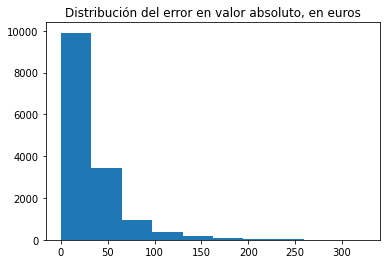

In [23]:
# Dibujamos el histograma de los errores
fig1 = plt.figure()
ax1 = plt.axes()
ax1.hist(np.abs(target_array - predicts))  # np.abs(boston.target - predicts) es el error en cada ejemplo

plt.title('Distribución del error en valor absoluto, en euros')
plt.show()

##### La buena noticia es que,fijandonos en la distribución del error, la mayoría de errores son bajos (menores a 25€), pero también se puede apreciar que hay unos pocos errores de más de 150€, incluso llegando a errores de 250€. Estos serían inasumibles. Veamos en qué rango de precios se concentran:

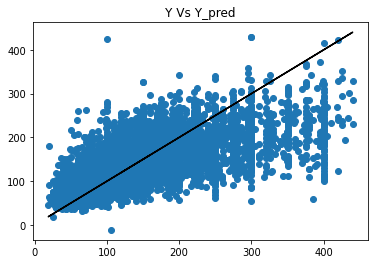

In [24]:
fig2 = plt.figure()
ax2 = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(target_array, predicts) 
# Pintamos la referencia de la predicción perfecta
ax2.plot(target_array, target_array, color='k') 

plt.title('Y Vs Y_pred')
plt.show()

 Como podemos observar, el modelo es más preciso en el rango de precios de entre 0 hasta 250. Sin embargo, a partir de 250, y acentuándose a partir de los 300€, vemos que los resultados no son nada fiables, pues el modelo no acierta casi nunca. Si estudiamos bien la scatter plot, nos damos cuenta de que las predicciones con precios reales a partir de los 300€ tienen una predicción muy parecida a los precios reales de menos de 300€ (es decir, los puntos no se ajustan a la recta, sino que se quedan a la misma altura que rangos de precios más bajos), lo que parece indicar que el modelo no entiende bien estos datos.   
En efecto, como ya predijimos al describir los estadísticos de los precios(apartado 1), tenemos muy pocas muestras altas(por encima de los 200), ya que, de hecho, la mayoría de nuestros precios se encuentran en el rango 80-160, por lo que los pisos de precio muy bajo tiende a corregirlos al alza(entre 0 y 100 hay más puntos por encima de la recta), y los precios altos tiende a corregirlos a la baja(y por eso los puntos de precio alto están todos por debajo de su valor real).